<a href="https://colab.research.google.com/github/jecordjotse/Dev_Data_proj_2/blob/master/Graded%20Quiz%20-%20MACHINE%20LEARNING_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import linear_model

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')                 

In [ ]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
new_df = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
appliance_target = normalised_df['Appliances']

#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliance_target, test_size=0.3, random_state=42)

model = LinearRegression()
#fit the model to the training dataset
model.fit(x_train, y_train)
#obtain predictions
predicted_values = model.predict(x_test)

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [ ]:
type(predicted_values)

numpy.ndarray

In [ ]:
type(y_test.to_numpy())

In [ ]:
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [ ]:
y_test.to_numpy()

array([0.02803738, 0.07476636, 0.03738318, ..., 0.03738318, 0.09345794,
       0.03738318])

### R2

In [44]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.149

### RSS

In [43]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss,3)

45.348

### TSS

In [45]:
y_mean = np.average(y_test)
tss = np.sum(np.square(y_test- y_mean))
round(tss,3)

53.281

### R2

In [46]:
r2_score = 1-(np.sum(rss)/np.sum(tss))
round(r2_score, 3)	#prints 0.893

0.149

### RMSE

In [47]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.088

In [ ]:
rmse = np.sqrt(np.sum(np.square(y_test- predicted_values))/len(predicted_values))
round(rmse, 3) 	#prints 0.089

0.088

# Question 12


In [4]:
simple_linear_reg_df = df[['T2', 'T6']].sample(25, random_state=42)

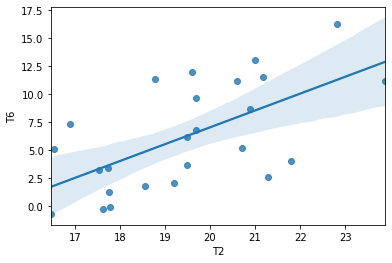

In [6]:
sns.regplot(x="T2", y="T6",data=simple_linear_reg_df)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(simple_linear_reg_df.T2, simple_linear_reg_df.T6, test_size=0.3, random_state=42)
x_train = x_train.to_numpy().reshape(-1, 1)
model = LinearRegression()
#fit the model to the training dataset
model.fit(x_train, y_train)
#obtain predictions
x_test = x_test.to_numpy().reshape(-1, 1)
predicted_values = model.predict(x_test)

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)	#prints 0.893

0.08

# Question 13

### MAE

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

2.96

# Question 14

### RSS

In [34]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss,2)

118.49

# Question 15

### RMSE

In [37]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

3.849

# Question 15

### R2 Coefficient of Determination

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

In [59]:
# PENALIZATION METHODS

### RIDGE

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

### LASSO

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights



,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [58]:
final_weights.describe()

,Linear_Model_Weight,Ridge_Weight,Lasso_weight
count,26.000000,26.000000,26.000000
mean,0.000874,0.002930,-0.001111
std,0.192184,0.172954,0.010492
min,-0.456698,-0.401134,-0.049557
25%,-0.043410,-0.045143,0.000000
50%,0.008579,0.008269,0.000000
75%,0.035832,0.033883,-0.000000
max,0.553547,0.511932,0.017880


In [60]:
predicted_values = ridge_reg.predict(x_test)

In [62]:
predicted_values
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [64]:
predicted_values = lasso_reg.predict(x_test)

In [65]:
predicted_values
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.094